## Uber Rider Case Study

## Data Wrangling

### 目標：預測 rider retention

### 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# plt.style.use('ggplot')

In [2]:
# Load data from csv into Pandas DataFrame
input_path = '/Users/ytshen/Desktop/BitTiger_DS501/Week_4/1-Uber_Case_Study_ML_Demo/data/'
df = pd.read_csv(input_path + 'raw_data.csv')

In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


從上面的輸出得知 `avg_rating_by_driver`, `avg_rating_of_driver` 和 `phone` 有空值

`last_trip_date` 和 `signup_date` 是 object，可以改成 datetime64

In [4]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
# Count missing values
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## 2. Explore Data

### Make plots for numeric variables

試著用各種不同的方法畫圖

* `df.column.plot.hist()`
* `df.column.plot(kind='hist')`
* `df.column.hist()`
* `df.plot(kind='hist', y='column')`
* `plt.hist(df.column.values)`
* `pd.DataFrame.hist(df[[column]])`
* `df[[column]].hist()`

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


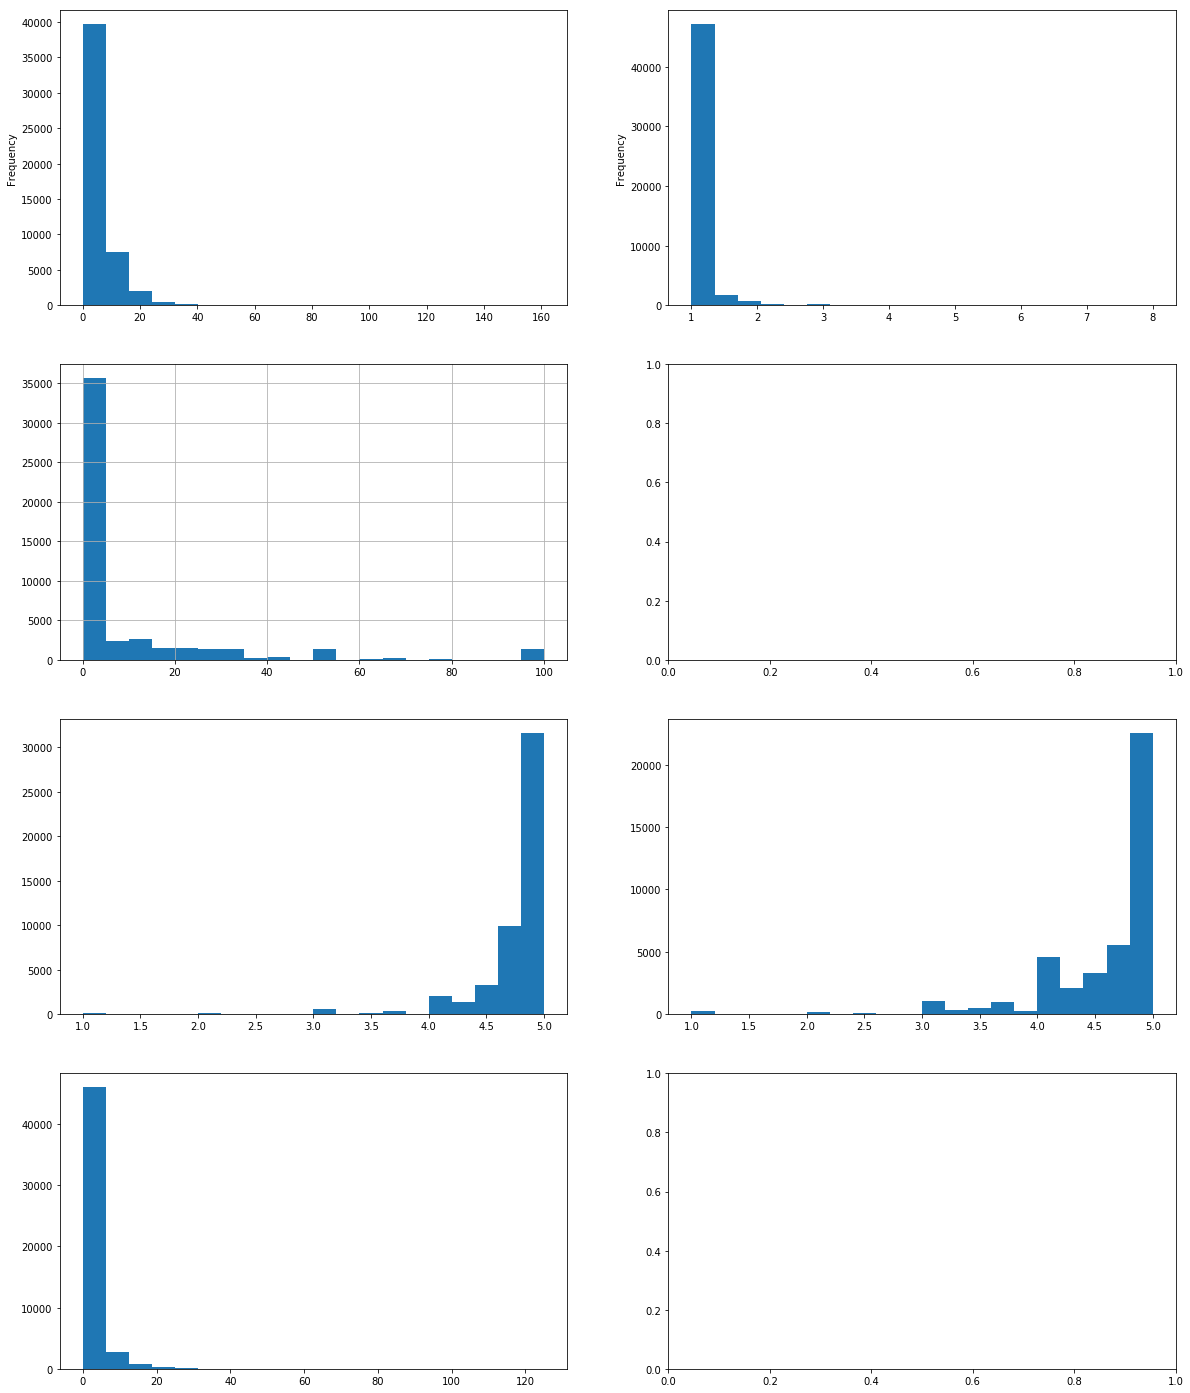

In [7]:
plt.subplots(4, 2, figsize=(20, 25))
plt.subplot(4, 2, 1)
df['avg_dist'].plot.hist(bins=20)
plt.subplot(4, 2, 2)
df['avg_surge'].plot(kind='hist', bins=20)
plt.subplot(4, 2, 3)
df['surge_pct'].hist(bins=20)
plt.subplot(4, 2, 4)
# df.plot(kind='hist', y='weekday_pct', bins=20) # 不知道單獨畫圖沒問題，畫在 subplot() 就沒圖
plt.subplot(4, 2, 5)
plt.hist(df['avg_rating_by_driver'].values, bins=20)
plt.subplot(4, 2, 6)
plt.hist(df['avg_rating_of_driver'].values, bins=20)
plt.subplot(4, 2, 7)
plt.hist(df['trips_in_first_30_days'].values, bins=20)
plt.show()

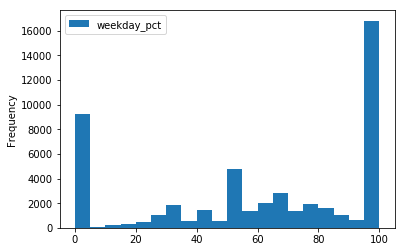

In [8]:
df.plot(kind='hist', y='weekday_pct', bins=20) # 單獨畫圖就沒問題
plt.show()

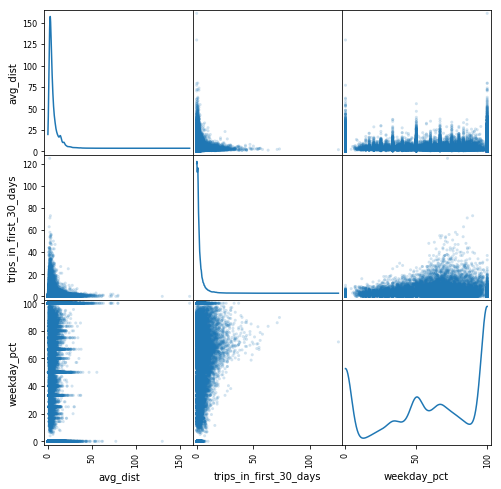

In [9]:
# scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[['avg_dist', 'trips_in_first_30_days', 'weekday_pct']],
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

### Categorical variables

In [10]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [11]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [12]:
df['luxury_car_user'].value_counts()

False    31146
True     18854
Name: luxury_car_user, dtype: int64

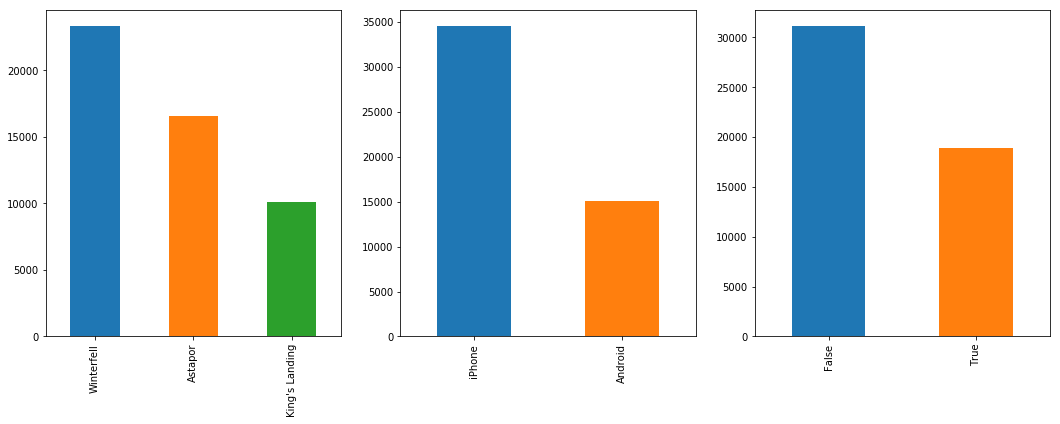

In [13]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
df['city'].value_counts().plot.bar()
plt.subplot(1, 3, 2)
df['phone'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
df['luxury_car_user'].value_counts().plot(kind='bar')
plt.show()

### Missing value imputation

In [14]:
# Count missing values
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

#### 1. drop missing values
盡量別 drop

In [15]:
df_dropna = df.dropna(axis=0) # 沿著 column 方向看，只要有 missing value 就把該 row 刪除
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
df_dropna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### 2. fill missing values
都用填值的方式來處理會比較好

In [17]:
df_fillna = df.copy()
# 填自定值
df_fillna['phone'] = df_fillna['phone'].fillna('unknown')
# 填中位數
df_fillna['avg_rating_by_driver'] = df_fillna['avg_rating_by_driver'].fillna(df_fillna['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df_fillna['avg_rating_of_driver'].fillna(df_fillna['avg_rating_of_driver'].median())
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [19]:
df_cleaned = df_fillna # Use df_cleaned, 兩者是同一個記憶體位置，只是不同名字

## 3. Transform data

### Time-series variable
convert to datetime

In [20]:
df_cleaned['last_trip_date'] = pd.to_datetime(df_cleaned['last_trip_date'])
df_cleaned['signup_date'] = pd.to_datetime(df_cleaned['signup_date'])

In [21]:
df_timestamp = df_cleaned[['last_trip_date', 'signup_date']].copy() # 用 copy() 才不會動到原本的
df_timestamp['count'] = 1
df_timestamp.head()

,last_trip_date,signup_date,count
0,2014-06-17,2014-01-25,1
1,2014-05-05,2014-01-29,1
2,2014-01-07,2014-01-06,1
3,2014-06-29,2014-01-10,1
4,2014-03-15,2014-01-27,1


In [22]:
df_timestamp.set_index('signup_date', inplace=True)
df_timestamp['count'].resample('1D').sum().head()

signup_date
2014-01-01    1737
2014-01-02    1004
2014-01-03    1213
2014-01-04    1485
2014-01-05    1343
Freq: D, Name: count, dtype: int64

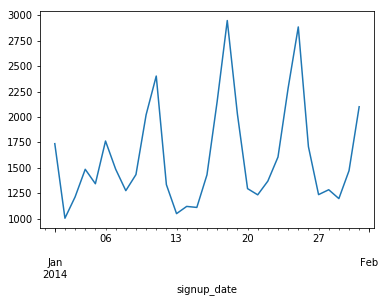

In [23]:
df_timestamp['count'].resample('1D').sum().plot()
plt.show()

In [24]:
df_timestamp.reset_index(inplace=True)
# df_timestamp.head()
df_timestamp.set_index('last_trip_date', inplace=True, drop=True)
df_timestamp['count'].resample('1D').sum().head()

last_trip_date
2014-01-01    128
2014-01-02    180
2014-01-03    128
2014-01-04    199
2014-01-05    270
Freq: D, Name: count, dtype: int64

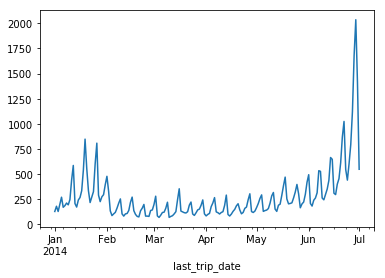

In [25]:
df_timestamp['count'].resample('1D').sum().plot()
plt.show()

In [26]:
date_str = '2014-06-01'
date_datetime = pd.to_datetime(date_str)
print(date_datetime)
print(type(date_datetime))
print(date_datetime.dayofweek) # monday=0, sunday=6

2014-06-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
6


In [27]:
df_cleaned['signup_dayofweek'] = df_cleaned['signup_date'].apply(lambda x: x.dayofweek)
df_cleaned.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dayofweek
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting categorical variables

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dayofweek          50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


Categorical variables: `city`, `phone`, `luxury_car_user`, `signup_dayofweek`

In [29]:
df_cleaned['luxury_car_user'] = df_cleaned['luxury_car_user'].astype(int)

one hot encoding

In [31]:
df_dummies = pd.get_dummies(df_cleaned[['city', 'phone', 'signup_dayofweek']], columns=['city', 'phone', 'signup_dayofweek'])
df_dummies.head()

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6
0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,0,0,0,0


In [32]:
df_cleaned2 = df_cleaned.join(df_dummies)
df_cleaned2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,phone_Android,phone_iPhone,phone_unknown,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,1,0,0,0,0,0,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,0,0,0,0,1,0,0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,1,0,1,0,0,0,0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,1,0,0,0,0,0,1,0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,1,0,0,1,0,0,0,0,0,0


In [33]:
df_cleaned2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dayofweek', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_unknown',
       'signup_dayofweek_0', 'signup_dayofweek_1', 'signup_dayofweek_2',
       'signup_dayofweek_3', 'signup_dayofweek_4', 'signup_dayofweek_5',
       'signup_dayofweek_6'],
      dtype='object')

## 4. Define labels
過去 30 天內沒有叫車的就當作是 churn

In [34]:
df_cleaned2['churn'] = df_cleaned2['last_trip_date'].apply(lambda x: 1 if x < pd.to_datetime('2014-06-01') else 0)
df_cleaned2['active'] = df_cleaned2['last_trip_date'].apply(lambda x: 1 if x >= pd.to_datetime('2014-06-01') else 0)
df_cleaned2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,phone_unknown,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,0,0,0,0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,1,0,0,0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,0,0,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,1,0,0,0,0,0,0,1,0


In [35]:
print(df_cleaned2['churn'].mean())
print(df_cleaned2['active'].mean())

0.62392
0.37608


### EDA with labels

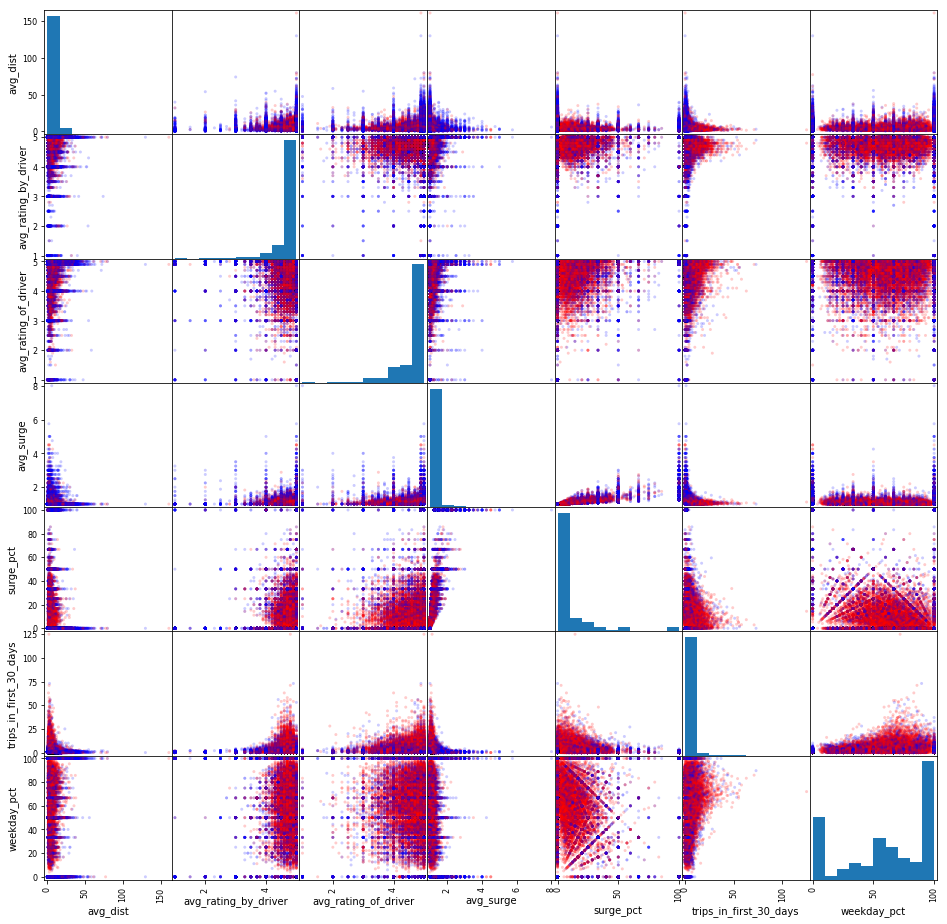

In [36]:
colors = ['red' if ix else 'blue' for ix in df_cleaned2['active']]
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
            'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
scatter_matrix(df_cleaned2[features], alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
plt.show()

看看不同的 feature 時的 churn

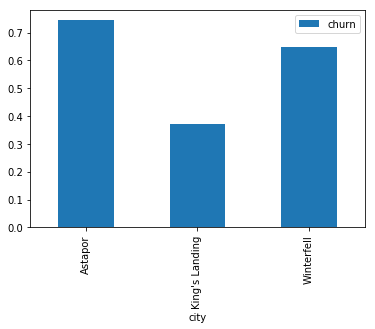

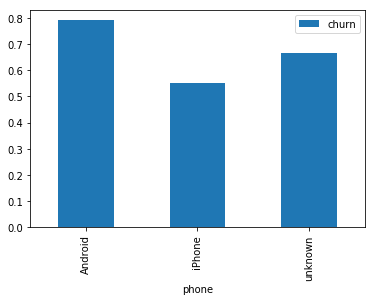

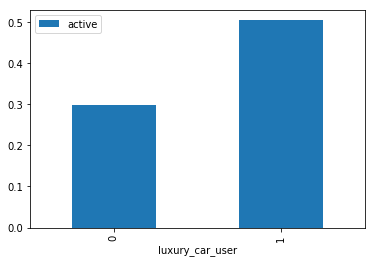

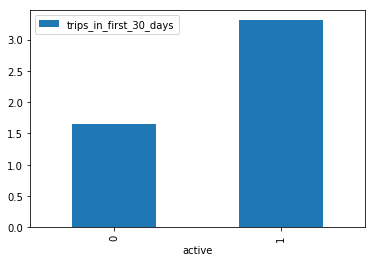

In [37]:
df_cleaned2[['churn', 'city']].groupby(['city']).mean().plot.bar()
plt.show()
df_cleaned2[['churn', 'phone']].groupby(['phone']).mean().plot.bar()
plt.show()
df_cleaned2[['active', 'luxury_car_user']].groupby('luxury_car_user').mean().plot.bar()
plt.show()
df_cleaned2[['active', 'trips_in_first_30_days']].groupby('active').mean().plot.bar()
plt.show()

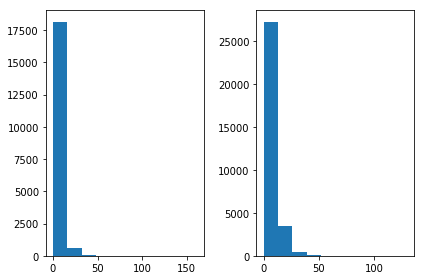

In [38]:
is_active = df_cleaned2['active'] == 1
fig, ax = plt.subplots(1, 2)
ax[0].hist(df[is_active]['avg_dist'].values)
ax[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

定義畫圖的函數

In [39]:
def hist_active_vs_churn(df, col):
    is_active = df['active'] == 1
    fig, ax = plt.subplots(1, 2)
    ax[0].hist(df[is_active][col].values)
    ax[0].set_title('Active users')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('counts')
    
    ax[1].hist(df[~is_active][col].values)
    ax[1].set_title('Churned users')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('counts')
    
    fig.tight_layout()
    plt.show()

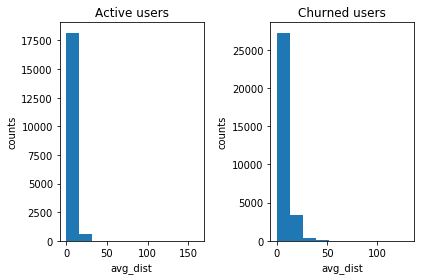

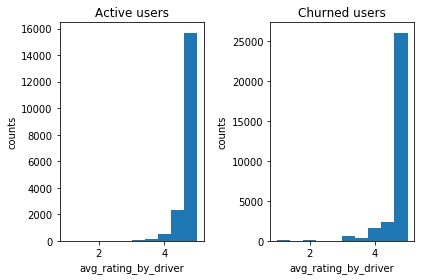

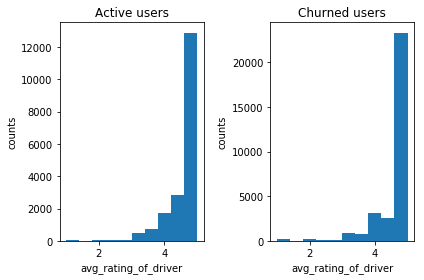

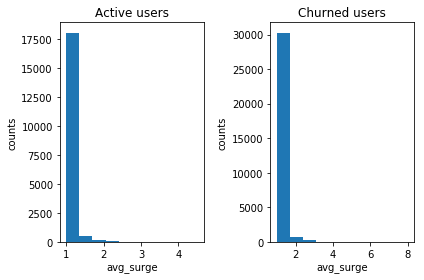

In [40]:
for col in ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge']:
    hist_active_vs_churn(df_cleaned2, col)

## 5. Save results into CSV

In [41]:
df_cleaned2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dayofweek', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_unknown',
       'signup_dayofweek_0', 'signup_dayofweek_1', 'signup_dayofweek_2',
       'signup_dayofweek_3', 'signup_dayofweek_4', 'signup_dayofweek_5',
       'signup_dayofweek_6', 'churn', 'active'],
      dtype='object')

In [42]:
selected_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
                     'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
                     'phone_Android', 'phone_iPhone', 'phone_unknown',
                     'city_Astapor', "city_King's Landing", 'city_Winterfell',
                     'signup_dayofweek_0', 'signup_dayofweek_1', 'signup_dayofweek_2',
                     'signup_dayofweek_3', 'signup_dayofweek_4', 'signup_dayofweek_5',
                     'signup_dayofweek_6',
                     'churn']
df_cleaned2[selected_features].to_csv('Uber_cleaned_data.csv', index=False)